In [55]:
!pip install wordcloud

In [56]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt #시각화 해주는 라이브러리

In [57]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time
from tqdm import tqdm_notebook as tqdm

In [58]:
driver = webdriver.Chrome(ChromeDriverManager().install())

In [59]:
driver.get('https://news.sbs.co.kr/news/newsflash.do?plink=NEW&cooper=SBSNEWSMAIN')

In [60]:
from bs4 import BeautifulSoup as bs
import requests as req

In [61]:
url_list = []
for i in tqdm(range(2)):
    page = 'https://news.sbs.co.kr/news/newsflash.do?plink=NEW&cooper=SBSNEWSMAIN&pageIdx={}'.format(i)
    driver.get(page)
    time.sleep(1)

    soup1 = bs(driver.page_source,'html.parser')
    search = soup1.select('a.news')
    for i in search:
        url_list.append('https://news.sbs.co.kr/' + i['href'])
len(url_list)

C:\Users\user\AppData\Local\Temp\ipykernel_4132\1671916065.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(1,11)):


  0%|          | 0/10 [00:00<?, ?it/s]

100

In [62]:
title_list = []
contents_list = []

for url in tqdm(url_list):
    driver.get(url)
    time.sleep(1)
    soup = bs(driver.page_source,'html.parser')  
    title = soup.select('div.w_article_title > h3')
    contents = soup.select('div.text_area')
    for i in title:
        title_list.append(i.text)
    # title_list.append(title[0].text)
    for i in contents:
        contents_list.append(i.text)  
    # contents_list.append(contents[0].text)
len(title_list), len(contents_list)

C:\Users\user\AppData\Local\Temp\ipykernel_4132\2041384990.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for url in tqdm(url_list):


  0%|          | 0/100 [00:00<?, ?it/s]

(100, 100)

In [63]:
import pickle

In [64]:
with open('wordcloud.pkl','wb') as f:
    wordcloud_contents_list = []
    for i in range(3):
        wordcloud_contents_list.append(contents_list[i])
    pickle.dump(wordcloud_contents_list, f)

In [ ]:
# with open('wordcloud.pkl','wb') as f:
#     pickle.dump(contents_list, f)


In [ ]:
# with open('wordcloud.pkl', 'rb') as f:
#     wordcloud_data = pickle.load(f)
# wordcloud_data
# wordcloud_data = wordcloud_data[:3]

In [65]:
with open('wordcloud.pkl', 'rb') as f:
    wordcloud_data = pickle.load(f)
wordcloud_data

["\n\n▲ A 씨를 발견한 증거 체취견 '라비'\xa0\n\n 경남 거제에서 실종됐던 90대 치매 노인이 증거 체취견 '라비'의 활약으로 실종 8시간 만에 무사히 가족의 품으로 돌아왔습니다. \n  \n 증거 체취견이란, 범죄·실종 현장 등에서 후각으로 피의자 또는 증거물을 발견하도록 훈련된 특수목적견을 말합니다. \n  \n 오늘(15일) 경남 거제경찰서는 전날 오후 4시쯤 거제시 둔덕면 산방산 4부 능선 지점에서 실종됐던 A(93)씨를 찾았다고 밝혔습니다. \n  \n 앞서 경찰은 A 씨의 아들로부터 '아버지께서 벌초를 하고 이동하던 중 사라졌다'는 내용의 신고를 접수했습니다.\xa0 \n  \n 이에 전날 7시쯤 시작된 수색에는 증거 체취견 2마리와 경찰 15명, 소방대원 20명이 동원돼 실종 장소 인근 묘지와 계곡 등 일대를 집중 수색했습니다. \n   \xa0 \n  \n\n\n이미지 확대하기\n\n증거체취견 라비 (사진=경남경찰청, 연합뉴스)\n\n▲ 증거 체취견 '라비'\n\n 수색을 시작한 지 5시간 만인 15일 밤 12시 20분쯤 현장에 있던 증거 체취견 '라비'는 실종 장소에서\xa0300ｍ 떨어진 계곡 인근 비탈길에서 A 씨를 발견했습니다. \n  \n A 씨는 탈진 외에 건강 상태에 큰 이상은 없는 것으로 확인됐습니다.\xa0 \n  \n A 씨 구조에 큰 공을 세운 '라비'는 2살 수컷 래브라도 레트리버종으로,\xa0작년 1월 증거 체취견으로 첫발을 내디딘 후 담당 핸들러(handler·조련사)인 최진균 경위와 1년 8개월째 경남 전역에서 활약하고 있습니다.\xa0 \n  \n (사진=연합뉴스)\n ",
 '\n  최근 물가 오름세가 지속되면서 평소 공짜로 제공되던 상품이나 서비스들이 중단되거나 유료화로 바뀌고 있습니다. \n  \n 서울·수도권에서는 밑반찬 리필을 요구했다가 500원에서 1000원가량 추가 요금을 받는 식당이 늘고 있어, 리필에 부담을 느끼는 사람들이 많아지고 있습니다.\xa0 \n  \n 원가 상승 압박에 시달리는

In [85]:
news = ''
for i in wordcloud_data:
    string = i.replace('\n','')
    string = string.replace('\xa0','')
    string = string.replace('\'','')
    news = news + string
news

'▲ A 씨를 발견한 증거 체취견 라비 경남 거제에서 실종됐던 90대 치매 노인이 증거 체취견 라비의 활약으로 실종 8시간 만에 무사히 가족의 품으로 돌아왔습니다.    증거 체취견이란, 범죄·실종 현장 등에서 후각으로 피의자 또는 증거물을 발견하도록 훈련된 특수목적견을 말합니다.    오늘(15일) 경남 거제경찰서는 전날 오후 4시쯤 거제시 둔덕면 산방산 4부 능선 지점에서 실종됐던 A(93)씨를 찾았다고 밝혔습니다.    앞서 경찰은 A 씨의 아들로부터 아버지께서 벌초를 하고 이동하던 중 사라졌다는 내용의 신고를 접수했습니다.    이에 전날 7시쯤 시작된 수색에는 증거 체취견 2마리와 경찰 15명, 소방대원 20명이 동원돼 실종 장소 인근 묘지와 계곡 등 일대를 집중 수색했습니다.       이미지 확대하기증거체취견 라비 (사진=경남경찰청, 연합뉴스)▲ 증거 체취견 라비 수색을 시작한 지 5시간 만인 15일 밤 12시 20분쯤 현장에 있던 증거 체취견 라비는 실종 장소에서300ｍ 떨어진 계곡 인근 비탈길에서 A 씨를 발견했습니다.    A 씨는 탈진 외에 건강 상태에 큰 이상은 없는 것으로 확인됐습니다.    A 씨 구조에 큰 공을 세운 라비는 2살 수컷 래브라도 레트리버종으로,작년 1월 증거 체취견으로 첫발을 내디딘 후 담당 핸들러(handler·조련사)인 최진균 경위와 1년 8개월째 경남 전역에서 활약하고 있습니다.    (사진=연합뉴스)   최근 물가 오름세가 지속되면서 평소 공짜로 제공되던 상품이나 서비스들이 중단되거나 유료화로 바뀌고 있습니다.    서울·수도권에서는 밑반찬 리필을 요구했다가 500원에서 1000원가량 추가 요금을 받는 식당이 늘고 있어, 리필에 부담을 느끼는 사람들이 많아지고 있습니다.    원가 상승 압박에 시달리는 기업과 자영업자들이 야박하다는 원성을 감수하고서라도 비용 절감에 나선 것입니다.   곳곳에서 공짜 서비스 중단 공짜 서비스 중단을 가장 쉽게 체감할 수 있는 곳은 식당입니다.    최근 인터넷 커뮤니티에는 밑반찬 

In [67]:
from konlpy.tag import Okt
okt = Okt()

In [162]:
stopwords = ['있다','하다','되다']

def extract_noun(string):
        nouns = okt.nouns(string)
        return nouns

def extract_Adjective(string):
    Adjective = okt.pos(string)
    Adjective_list = []
    for word, tag in Adjective:
        if((tag in 'Adjective') and (word not in stopwords) ):
            Adjective_list.append(word)
    return Adjective_list

def extract_Verb(string):
    Verb = okt.pos(string, stem=True, norm=True)
    Verb_list = []
    for word, tag in Verb:
        if((tag in 'Verb') and (word not in stopwords)):
            Verb_list.append(word)  
    return Verb_list

def extract_word(string):
    noun = extract_noun(string)
    Adjective = extract_Adjective(string)
    Verb = extract_Verb(string)
    word_list = []
    for i in noun+Adjective+Verb:
        word_list.append(i) 
    return word_list

# def extract_word(string):
#     noun = extract_noun(string)
#     Adjective = extract_Adjective(string)
#     Verb = extract_Verb(string)
#     word_list = noun + Adjective + Verb
#     return word_list

In [163]:
text_data = extract_word(news)
text_data

['씨',
 '발견',
 '증거',
 '체취견',
 '라비',
 '경남',
 '거제',
 '실종',
 '치매',
 '노인',
 '증거',
 '체취견',
 '라비',
 '활약',
 '실종',
 '가족',
 '품',
 '증거',
 '체취견',
 '범죄',
 '실종',
 '현장',
 '등',
 '후각',
 '피의자',
 '증거물',
 '발견',
 '훈련',
 '특수',
 '목적',
 '견',
 '말',
 '오늘',
 '경남',
 '거제',
 '경찰서',
 '전날',
 '오후',
 '거제시',
 '둔덕면',
 '산방산',
 '부',
 '능선',
 '지점',
 '실종',
 '씨',
 '앞서',
 '경찰',
 '씨',
 '아들',
 '로부터',
 '아버지',
 '벌초',
 '이동',
 '중',
 '내용',
 '신고',
 '접수',
 '이',
 '전날',
 '시작',
 '수색',
 '증거',
 '체취견',
 '마리',
 '경찰',
 '명',
 '소방대',
 '명',
 '동원',
 '실종',
 '장소',
 '인근',
 '묘지',
 '계곡',
 '등',
 '일대',
 '집중',
 '수색',
 '이미지',
 '확대',
 '증거',
 '체',
 '취견',
 '라비',
 '사진',
 '경남',
 '경찰청',
 '연합뉴스',
 '증거',
 '체취견',
 '라비',
 '수색',
 '시작',
 '만인',
 '밤',
 '현장',
 '증거',
 '체취견',
 '라비',
 '실종',
 '장소',
 '계곡',
 '인근',
 '비탈길',
 '씨',
 '발견',
 '씨',
 '탈진',
 '외',
 '건강',
 '상태',
 '이상은',
 '것',
 '확인',
 '씨',
 '구조',
 '공',
 '세운',
 '라비',
 '살',
 '수컷',
 '래브라도',
 '레트',
 '리버',
 '종',
 '작년',
 '증거',
 '체취견',
 '발',
 '후',
 '담당',
 '핸들',
 '러',
 '조련사',
 '인',
 '최진',
 '균',
 '경위',
 '개월',
 '경남',
 '전역',
 '활약',
 '

In [164]:
count = Counter(text_data)
count

Counter({'씨': 6,
         '발견': 3,
         '증거': 8,
         '체취견': 7,
         '라비': 6,
         '경남': 4,
         '거제': 2,
         '실종': 6,
         '치매': 1,
         '노인': 1,
         '활약': 2,
         '가족': 1,
         '품': 1,
         '범죄': 1,
         '현장': 2,
         '등': 7,
         '후각': 1,
         '피의자': 1,
         '증거물': 1,
         '훈련': 1,
         '특수': 1,
         '목적': 1,
         '견': 1,
         '말': 5,
         '오늘': 4,
         '경찰서': 1,
         '전날': 2,
         '오후': 1,
         '거제시': 1,
         '둔덕면': 1,
         '산방산': 1,
         '부': 1,
         '능선': 1,
         '지점': 1,
         '앞서': 1,
         '경찰': 2,
         '아들': 1,
         '로부터': 2,
         '아버지': 1,
         '벌초': 1,
         '이동': 1,
         '중': 2,
         '내용': 1,
         '신고': 1,
         '접수': 1,
         '이': 7,
         '시작': 3,
         '수색': 3,
         '마리': 1,
         '명': 2,
         '소방대': 1,
         '동원': 1,
         '장소': 2,
         '인근': 2,
         '묘지': 1,
         

In [149]:
count.most_common(10)

[('증거', 8),
 ('체취견', 7),
 ('등', 7),
 ('이', 7),
 ('있습니다', 7),
 ('씨', 6),
 ('라비', 6),
 ('실종', 6),
 ('것', 6),
 ('입니다', 6)]

##### 워드 클라우드
    영어만 인식, 한글사용하려면 폰트 지정해줘야 함
    워드 클라우드는 계속 새롭게 생성됨
    결과값이 같아도 위치가 다를 수 있음
    위치를 고정하고 싶을 때 random_state 사용
    (머신러닝에 사용 : 모델을 만들 때마다 결과값이 다르게 나오는데 동일하게 값을 내고 싶을 때 설정)

    matplotlib 사용하면 축이 설정됨
        -> axis로 축 설정

In [143]:
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\\batang.ttc',
                        width = 700,
                        height = 700,
                        background_color = 'white',
                        colormap = 'spring',
                        mask = mask_image,
                        random_state = 1).generate_from_frequencies(count)

<function matplotlib.pyplot.show(close=None, block=None)>

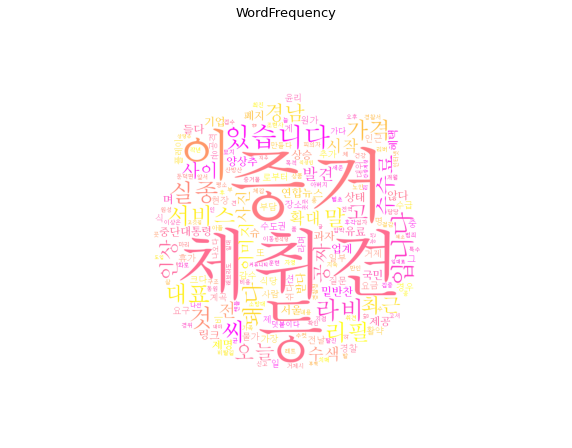

In [144]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("WordFrequency", size = 13)
plt.show

##### 워드 클라우드에 마스크 씌우기
    이미지 불러올 수 있는 라이브러리 추가실행
    적용할 이미지의 배경은 흰색 배경이어야 함
    

In [123]:
from PIL import Image
import numpy as np

In [127]:
mask_image = np.array(Image.open('C:\Study\데이터 수집, 웹 개요\\3일차\라이언이미지.jpg'))